In [ ]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 66 Apr 13 06:40 kaggle.json


In [ ]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d himanshuagarwal1998/glaucomadataset

100% 2.54G/2.54G [00:28<00:00, 86.8MB/s]



In [ ]:
!unzip -q /content/glaucomadataset.zip

In [ ]:
#!wget http://cecas.clemson.edu/~ahoover/stare/images/all-images.zip

'/content/teja/all-images.zip'

In [ ]:
!unzip -q /content/teja/all-images.zip

In [ ]:
!mkdir 'Data_set'

In [ ]:
import shutil, sys
shutil.move("/content/Non Glaucoma", "/content/Data_set")

'/content/Data_set/Non Glaucoma'

In [ ]:
shutil.move("/content/Glaucoma", "/content/Data_set")

'/content/Data_set/Glaucoma'

In [ ]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [ ]:
classifier = Sequential()
#frist hidden layer

classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
#second hidden layer

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
#last layer

classifier.add(Flatten())

classifier.add(Dense(activation = 'relu',units=128))
classifier.add(Dense(activation = 'sigmoid',units=1))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
import os 
os.getcwd()
#os.chdir('C:/Users/hp/Desktop/code/Brain_tumor')
print(os.getcwd())

/content


In [ ]:
training_set = train_datagen.flow_from_directory('/content/Data_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/Data_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 1022 images belonging to 2 classes.
Found 1022 images belonging to 2 classes.


In [ ]:
classifier.fit_generator(training_set, steps_per_epoch=1, epochs=100, verbose=1, callbacks=None, validation_data=test_set, validation_steps=1, class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False, shuffle=True, initial_epoch=0)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.6926 - accuracy: 0.5312 - val_loss: 0.6057 - val_accuracy: 0.9062
Epoch 2/100
1/1 [==============================] - 4s 4s/step - loss: 0.6263 - accuracy: 0.8125 - val_loss: 0.6916 - val_accuracy: 0.4688
Epoch 3/100
1/1 [==============================] - 4s 4s/step - loss: 0.6216 - accuracy: 0.6875 - val_loss: 0.4525 - val_accuracy: 0.8750
Epoch 4/100
1/1 [==============================] - 3s 3s/step - loss: 0.5126 - accuracy: 0.7812 - val_loss: 0.4355 - val_accuracy: 0.8750
Epoch 5/100
1/1 [==============================] - 5s 5s/step - loss: 0.4544 - accuracy: 0.8750 - val_loss: 0.3167 - val_accuracy: 0.9062
Epoch 6/100
1/1 [==============================] - 4s 4s/step - loss: 0.2859 - accuracy: 0.9375 - val_loss: 0.4155 - val_accuracy: 0.8750
Epoch 7/100
1/1 [==============================] - 4s 4s/step - loss: 0.3761 - accuracy: 0.8438 - val_loss: 0.2539 - val_accuracy: 0.9062
Epoch 8/100
1/1 [=================

In [ ]:
# Save the model
classifier.save('path_to_my_model.h5')

# Recreate the exact same model purely from the file
new_model = keras.models.load_model('path_to_my_model.h5')

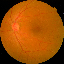

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/Data_set/Non Glaucoma/40c24aded50c.png', target_size = (64, 64))
test_image

In [ ]:
test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)
test_image

array([[[[1., 0., 0.],
         [2., 1., 0.],
         [2., 0., 1.],
         ...,
         [1., 1., 1.],
         [2., 1., 0.],
         [1., 0., 0.]],

        [[1., 1., 1.],
         [0., 0., 0.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [0., 0., 0.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [1., 1., 1.]],

        [[0., 0., 0.],
         [1., 1., 1.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [1., 1., 1.],
         ...,
         [0., 0., 0.],
         [0., 0., 4.],
         [0., 0., 0.]]]], dtype=float32)

In [ ]:
result = new_model.predict(test_image)
result

array([[1.]], dtype=float32)

In [ ]:
test = training_set.class_indices
test

{'Glaucoma': 0, 'Non Glaucoma': 1}

In [ ]:
for i,j in test.items():
  if result[0] ==j:
    print('Predected Image is Glaucoma')
  else:
    print('Predected Image is Non Glaucoma')
    break

Predected Image is Non Glaucoma
